In [1]:
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
import pandas as pd

file_path = "Data/dataset1.csv"
df = pd.read_csv(file_path)

df.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [3]:
summary = df.describe()
summary

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


### Dataset Cleaning

In [4]:
missing_values_count = df.isnull().sum()
missing_values_count

N         0
P         0
K         0
pH        0
EC        0
OC        0
S         0
Zn        0
Fe        0
Cu        0
Mn        0
B         0
Output    0
dtype: int64

### Correlation Matrix

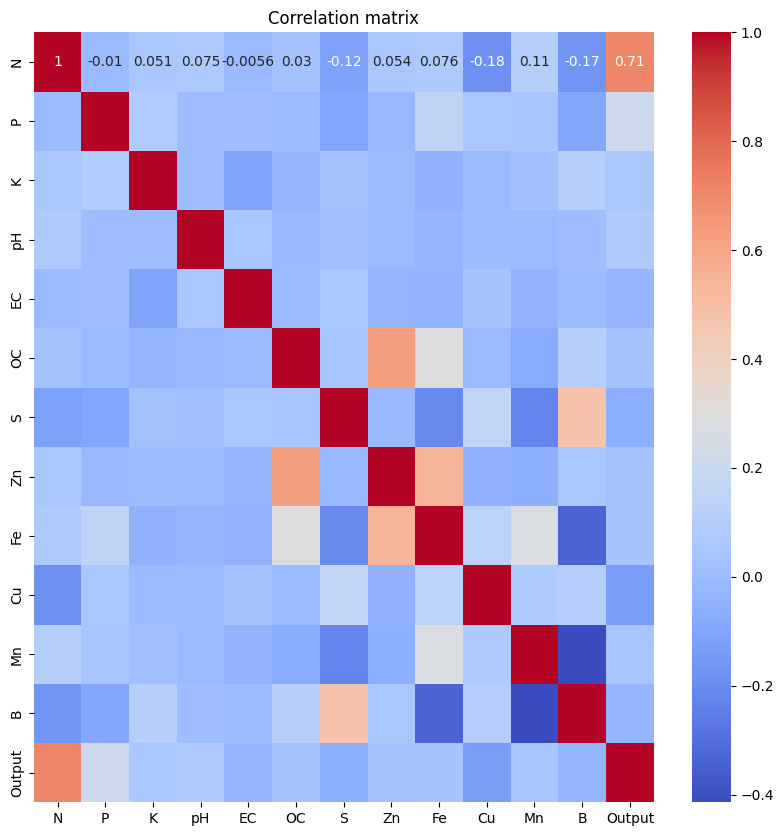

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

### Class Distribution

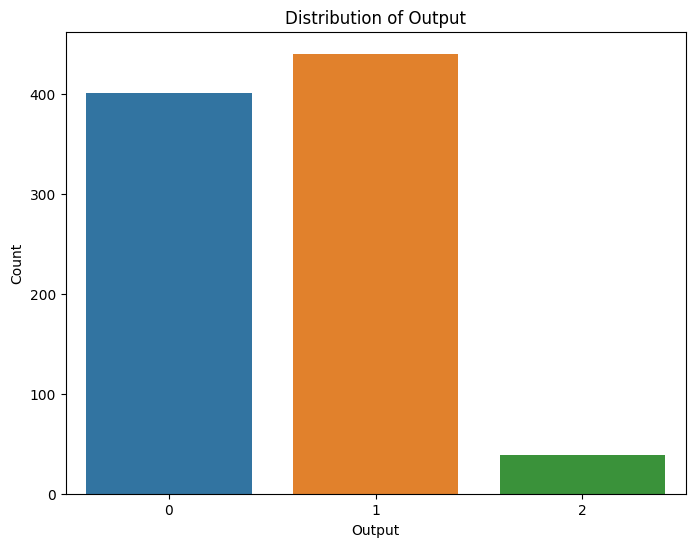

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x='Output', data=df)
plt.title('Distribution of Output')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()

### Model Training

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['Output'], axis=1)
y = df['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((704, 12), (176, 12), (704,), (176,))

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classificaiton_report = classification_report(y_test, y_pred)

In [11]:
print('Accuracy: ', accuracy)
print('Classification report: \n', classificaiton_report)

Accuracy:  0.8863636363636364
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        78
           1       0.90      0.89      0.89        88
           2       1.00      0.20      0.33        10

    accuracy                           0.89       176
   macro avg       0.92      0.69      0.72       176
weighted avg       0.89      0.89      0.87       176



### Save the trained model

In [35]:
model.save_model("xgboost_model_soil.bin")